# Opening the file 

In [4]:
from skimage.io import imread

image = imread("JupyterTest3.tif")


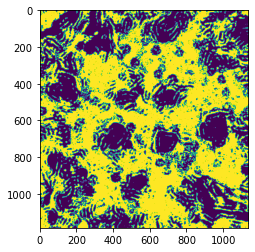

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [6]:
image.shape

(1186, 1136)

# Processing

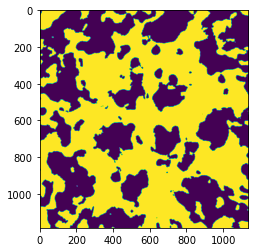

In [7]:
import skimage 
from skimage import filters
from skimage.morphology import disk

median_filtered = filters.median(image, disk(15))
plt.imshow(median_filtered)
plt.show()

In [8]:
from skimage import filters

threshold = filters.threshold_otsu(median_filtered)
print(threshold)

1.0019531


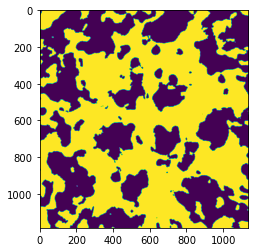

In [9]:
thresholded_image2 = median_filtered >= threshold

plt.imshow(thresholded_image2)
plt.show()

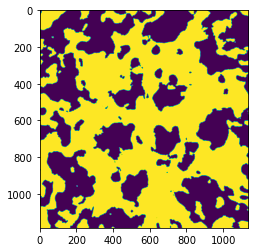

In [10]:
from skimage import morphology

dilated_binary_image = morphology.binary_dilation(thresholded_image2)

plt.imshow(dilated_binary_image)
plt.show()

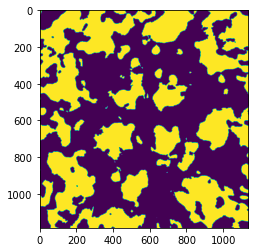

In [11]:
import numpy as np 
inverted_image = np.invert(dilated_binary_image)
plt.imshow(inverted_image)
plt.show()

# Analysis 

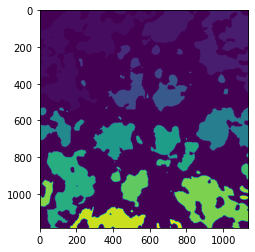

In [12]:
import skimage 
from skimage import measure

# run connected components analysis
label_image = measure.label(inverted_image)

plt.imshow(label_image)
plt.show()

In [13]:
from skimage import measure

# analyse objects
table = measure.regionprops_table(label_image, properties=('area', 
                                                           'centroid',
                                                           'orientation',
                                                           'major_axis_length',
                                                           'minor_axis_length'))

# show table
table

{'area': array([   176, 123185,   1297,  33323,  66407,      1,   1796,   3114,
           752,   2262,    561,     33,   1658,  18467,     68,   1272,
         19319,    253,    552,     53,    581,    175,     43,      1,
            70,  40407,   1217,    292,  14925,     42,    156,   1763,
         28122,  18164,    933,     42,   9082,  55396,    291,      6,
          2153,     13,   2527,   2542,     12,  17219,    283,     17,
         61538,   6119,   1176,     26,      3,      8,    862,  27885,
           117,      2,   1466,    386,     46]),
 'centroid-0': array([   8,  215,    9,   87,  184,  165,  218,  225,  227,  288,  282,
         313,  344,  450,  339,  375,  458,  363,  396,  405,  443,  468,
         481,  522,  531,  640,  550,  539,  651,  551,  587,  625,  701,
         710,  707,  700,  792,  946,  788,  785,  829,  825,  871,  903,
         868,  959,  883,  883, 1042,  998,  977,  986,  983, 1005, 1019,
        1138, 1093, 1130, 1160, 1172, 1179]),
 'centro

In [15]:
import pandas as pd
df = pd.DataFrame(table)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
    





In [16]:
print (df)

      area  centroid-0  centroid-1  orientation  major_axis_length  minor_axis_length
0      176           8           3    -0.216962          25.636758           9.801883
1   123185         215         213    -0.719212         700.935470         424.347074
2     1297           9         436     1.484860          69.588645          24.849731
3    33323          87         693    -1.098299         295.744910         150.994813
4    66407         184        1008     0.024310         420.330297         321.330763
5        1         165        1017     0.785398           0.000000           0.000000
6     1796         218         629    -0.390616          52.760171          43.832577
7     3114         225         454    -0.649204          94.566180          45.869605
8      752         227         759     0.557953          33.505051          30.452748
9     2262         288         515    -0.537553          64.804889          48.849515
10     561         282         222     0.239532       